In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\Admin'

In [3]:
os.chdir('C:\\Users\\Admin\\Downloads\\archive (1)')

In [4]:
df = pd.read_excel('Retail.xlsx')

In [5]:
df.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [7]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

### Here approximately 0.25% of data from 'Itemname' is missing while 25.66% of data from customerId is missing. Let's fix this.

In [8]:
df.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


### Here I can see some negative values in Quantity and Price, so let's dive deep to know story of this negative values.

### Checking Outliers

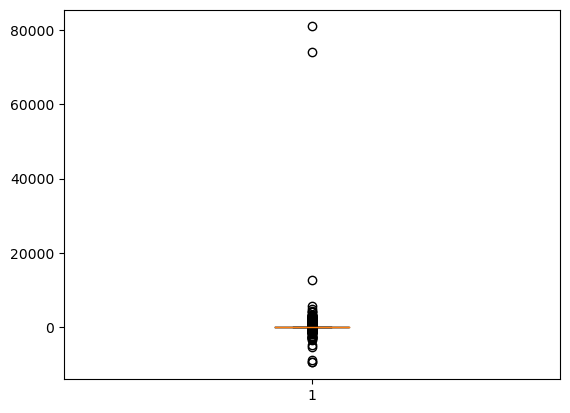

In [9]:
plt.boxplot(df['Quantity'])
plt.show()

In [10]:
df[df['Quantity'] > 60000]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
59999,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
520583,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


### Though Quantity column is having an outlier I don't think deleting it will be appropriate as it is holding important information.

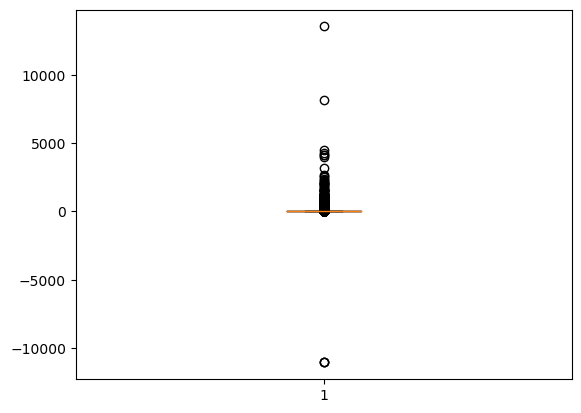

In [62]:
plt.boxplot(df['Price'])
plt.show()

In [32]:
df['Price'] = df['Price'].replace(11062.06, -11062.06)


In [33]:
len(df[df['Price'] < 0])

3

### We have 3 negative Pricing, let's understand behind the scenes for this negative pricing!
.

In [34]:
df[df['Price'] < 0]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
288772,A563185,Adjust bad debt,1,2011-08-12 14:50:00,-11062.06,NaN,United Kingdom
288773,A563186,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
288774,A563187,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


### Here we can clearly see that where the Itemname is 'Adjust bad debt' there we have negative Pricing. 


### 'Adjust bad debt' refers to adjustments done on its financial records when it is unlikely to collect payments from customers

In [14]:
df[df['Quantity'] < 0]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4289,536764,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
6998,536996,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
6999,536997,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7000,536998,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
515636,581212,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
515637,581213,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
517209,581226,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


### Here I found very interesting clue i.e. where the Itemnames value include keyword like 'check', 'lost', 'missing', 'smashed', '??', 'NAN', 'Damage', etc., certain patterns emerge in the dataset:
### 1] The "Quantity" tends to be negative, indicating a reduction in the quantity of items, possibly due to loss, damage, or returns.
### 2] The "Price" is often zero, suggesting that no payment was involved, likely because the items were lost or damaged.
### 3] The "CustomerID" is missing (NULL), which implies that these transactions may not be associated with specific customers, indicating a possible connection to issues like loss or damage.

## *As you can see that there are missing values in CustomerID because no transaction was happened between them. So in this case I am going to replace Null customerid with 'N/A' as they will tell us how many transaction were failed.*

In [63]:
df['CustomerID'] = df['CustomerID'].fillna('N/A')

## So while analysing I got to know that wherever the Price is ZERO the corresponding itemname is either 'missing', 'damage', 'lost', '????','smashed','???missing','broken','blanks',etc.

## So I'm replacing this chaotic names with missing/damaged.

In [64]:
df.loc[df['Price'] == 0, 'Itemname'] = 'Missing/Damaged'


In [65]:
df['Itemname'] = df['Itemname'].fillna('Missing/Damage')


In [66]:
df.to_excel('Retail.xlsx', index=False)


In [69]:
df[df['Itemname'] == 'Missing/Damaged']

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,Missing/Damaged,56,2010-12-01 11:52:00,0.0,N/A,United Kingdom
1937,536545,Missing/Damaged,1,2010-12-01 14:32:00,0.0,N/A,United Kingdom
1938,536546,Missing/Damaged,1,2010-12-01 14:33:00,0.0,N/A,United Kingdom
1939,536547,Missing/Damaged,1,2010-12-01 14:33:00,0.0,N/A,United Kingdom
1940,536549,Missing/Damaged,1,2010-12-01 14:34:00,0.0,N/A,United Kingdom
...,...,...,...,...,...,...,...
515635,581211,Missing/Damaged,14,2011-12-07 18:36:00,0.0,N/A,United Kingdom
517266,581234,Missing/Damaged,27,2011-12-08 10:33:00,0.0,N/A,United Kingdom
518770,581406,Missing/Damaged,240,2011-12-08 13:58:00,0.0,N/A,United Kingdom
518771,581406,Missing/Damaged,300,2011-12-08 13:58:00,0.0,N/A,United Kingdom


## A very interesting point to note here is, wherever the quantity is negative the corresponding item is RETURNED and this is represented by 'return', 'returned', '??re-turned??', 'reverse' and many many more chaotic names. 
## So where the quantity is negative I am replacing them with "Returned"

In [67]:
df.loc[df['Quantity'] < 0, 'Itemname'] = 'Returned'


In [70]:
df[df['Itemname'] == 'Returned']

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,Returned,-10,2010-12-01 16:50:00,0.0,N/A,United Kingdom
4289,536764,Returned,-38,2010-12-02 14:42:00,0.0,N/A,United Kingdom
6998,536996,Returned,-20,2010-12-03 15:30:00,0.0,N/A,United Kingdom
6999,536997,Returned,-20,2010-12-03 15:30:00,0.0,N/A,United Kingdom
7000,536998,Returned,-6,2010-12-03 15:30:00,0.0,N/A,United Kingdom
...,...,...,...,...,...,...,...
515634,581210,Returned,-26,2011-12-07 18:36:00,0.0,N/A,United Kingdom
515636,581212,Returned,-1050,2011-12-07 18:38:00,0.0,N/A,United Kingdom
515637,581213,Returned,-30,2011-12-07 18:38:00,0.0,N/A,United Kingdom
517209,581226,Returned,-338,2011-12-08 09:56:00,0.0,N/A,United Kingdom


In [71]:
df.to_excel('Retail.xlsx', index=False)


# Completed with data cleaning task! 